# Homework 2

### Luyao Wang
Netid: lw337

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

## 1) Swaping amplitude and phase in Fourier space
**(2 points)**

**a)** Load the racoon face image and the camera image (using *from skimage import data, camera = data.camera()*) and convert them to gray values where necessary. Then cut squares of size 500 by 500 pixels from each of the two images and show them.(*0.5 points*) 

**b)** Do a Fourier transformation on each image, the separate each result into an amplitude and a phase matrix. (*0.5 points*)  

**c)** In Fourierspace, create two new images: one using the racoon amplitude and the camera phase and one using the camera amplitude and the racoon phase. Transform both images back into real space and display their absolute value. (*1 point*)  

**ANSWER**

In [2]:
from scipy import datasets
from skimage import data

face = datasets.face(gray=True)
camera = data.camera()

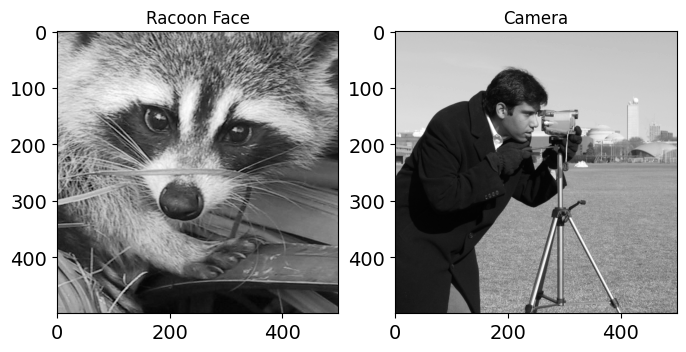

In [3]:
face_square = face[150:650, 400:900]
camera_square = camera[:500, :500]

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(face_square, cmap="gray")
plt.title("Racoon Face")
plt.subplot(122)
plt.imshow(camera_square, cmap="gray")
plt.title("Camera")
plt.show()

In [4]:
combined_image_fft = np.fft.fft2(face_square)
camera_fft = np.fft.fft2(camera_square)

face_amplitude = np.abs(combined_image_fft)
face_phase = np.angle(combined_image_fft)
camera_amplitude = np.abs(camera_fft)
camera_phase = np.angle(camera_fft)

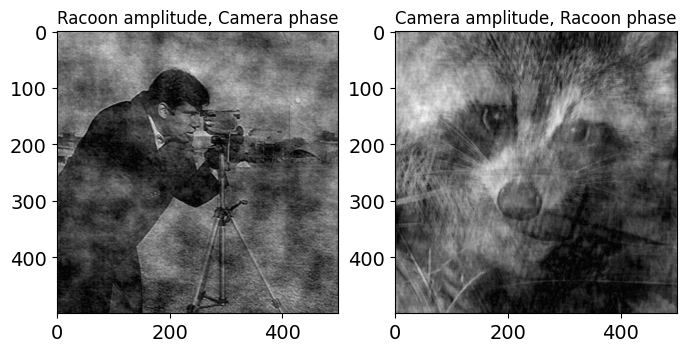

In [5]:
new_image1 = face_amplitude * np.exp(1j * camera_phase)
new_image2 = camera_amplitude * np.exp(1j * face_phase)

new_image1_real = np.fft.ifft2(new_image1)
new_image2_real = np.fft.ifft2(new_image2)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(np.abs(new_image1_real), cmap="gray")
plt.title("Racoon amplitude, Camera phase")
plt.subplot(122)
plt.imshow(np.abs(new_image2_real), cmap="gray")
plt.title("Camera amplitude, Racoon phase")
plt.show()

## 2) Notch filter
**(3 points)**

We first create an image with a periodic perturbation, then remove that perturbation by setting *only the right* Fourier components to zero. 

**a)** Load the person with a camera image (from skimage), convert it to float (range zero to one) and cut it again to 500 by 500 pixels. Then create a second image (again size 500 by 500) of a horizontal sine wave (i.e. the gray values in each column are all identical) of mode 20 and gray values between zero and one. This can be done in a number of ways, one option is to create a row vector with the sinusoidal values and then use np.tile() to expand it into a matrix. Display those two images. Finally create a new image by adding the camera and the sine wave image. Display the combined image. (*1 point*) 

**b)** Fouriertransform the combined image. Then display the Fourier amplitudes using a logarithmic scaling. Limit the figure to the modes in the range -50 to 50, i.e. your image should have 101 by 101 pixels. 

Then create a regular plot of the absolute value of those Fourier amplitudes which correspond to horizontal waves. This means reading out one row from the Fourier space image. You can keep the x-axis to be the pixel coordinate of the Fourier space image. (If you want to make it mode number, you will need some re-scaling here. Hint: where is mode zero?) (*1 point*) 

**c)** Perform a notch filter, i.e. set the Fourier amplitudes corresponding to the sine wave (and only those!) to zero. Finally, do an inverse Fouriertransformation and display the resulting image. (*1 point*) 

some remarks:
- In a) avoid leackage. Meaning if you attach a copy of your pattern on the right side of itself, there will be no jump and also not two points in series which have the same value.

- in c) do not set parts of the Fourier space to zero that are not representing the sine wave. Otherwise we will subtract points. If you think you need more than two points for the filter, you have leakage.

- If you are completely unsure which amplitudes to mask, try a Fourier transform of the sine wave image alone.

plot of $y=\frac{\sin(-\frac{\pi}{2} + \frac{2\pi}{25}x) + 1}{2}$

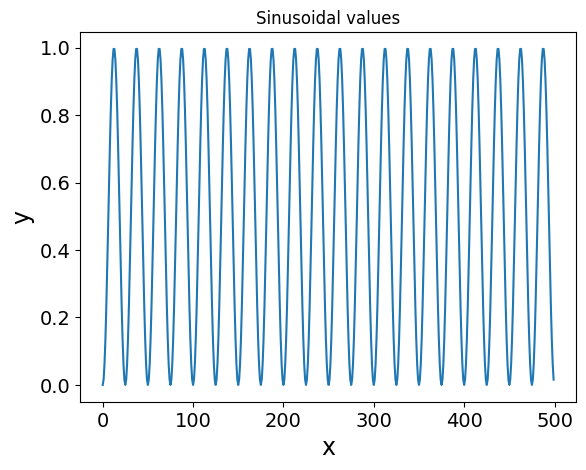

In [6]:
x = np.arange(0, 500)
y = (np.sin(-np.pi / 2 + (2 * np.pi / 25) * x) + 1) / 2

plt.plot(x, y)
plt.title("Sinusoidal values")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

**Answer**

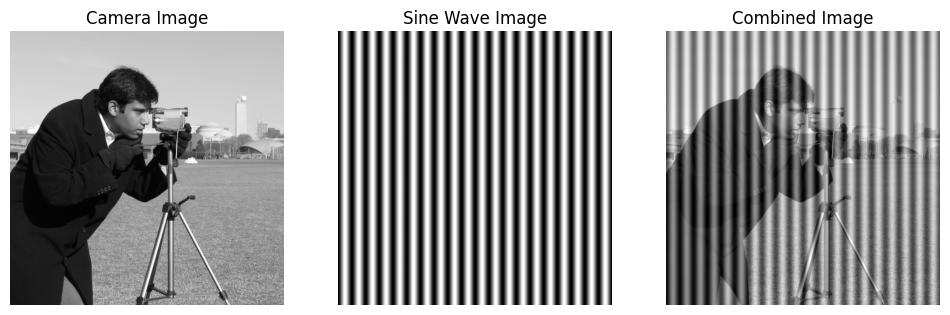

In [7]:
camera_image = data.camera()
camera_image = camera_image.astype(float) / 255.0
camera_image = camera_image[:500, :500]

sine_wave_image = np.tile(y, (500, 1))
combined_image = camera_image + sine_wave_image

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(camera_image, cmap="grey")
axes[0].axis("off")
axes[0].title.set_text("Camera Image")
axes[1].imshow(sine_wave_image, cmap="grey")
axes[1].axis("off")
axes[1].title.set_text("Sine Wave Image")
axes[2].imshow(combined_image, cmap="grey")
axes[2].axis("off")
axes[2].title.set_text("Combined Image")

Text(0.5, 1.0, 'logscale & shifted Fourier space of modes from 0 to 20')

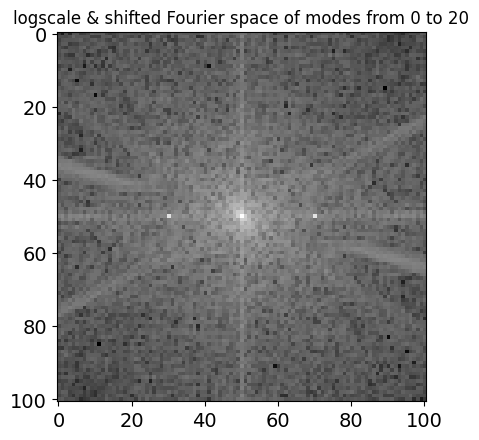

In [8]:
combined_image_fft = np.fft.fft2(combined_image)
combined_image_fft_abs = np.abs(combined_image_fft)
combined_image_fft_log = np.log(combined_image_fft_abs + 0.0000001)
combined_image_fft_log_shift = np.fft.fftshift(combined_image_fft_log)

plt.imshow(combined_image_fft_log_shift[200:301, 200:301], cmap=plt.cm.gray)
plt.title("logscale & shifted Fourier space of modes from 0 to 20")

Text(0.5, 1.0, 'Reconstructed image with sinusoidal waves filtered')

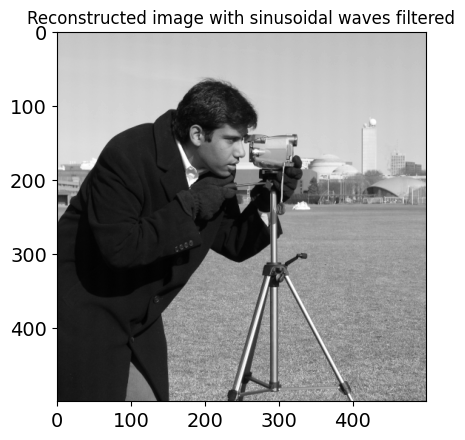

In [9]:
phase_combined_image_fft = np.angle(combined_image_fft)
amp_shift = np.fft.fftshift(combined_image_fft_abs)
phase_shift = np.fft.fftshift(phase_combined_image_fft)

amp_shift[250, 230] = 0
amp_shift[250, 270] = 0

reconstruct_fft = amp_shift * np.exp(1j * phase_shift)
reconstruct = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstruct_fft)))

plt.imshow(reconstruct, cmap=plt.cm.gray)
plt.title("Reconstructed image with sinusoidal waves filtered")

## 3) Image sharpening with a Laplacian filter

**(1.5 points)**

This exercise describes a technique applied by many image processing programs such as photoshop or gimp to make blurry image appear sharper. 

Load the raccon face image (using (gray=True)), convert it to float and cut out a 150 by 150 region containing some fur. Then create a blurry version of the image by applying a Gaussian filter with a sigma of 1. This is the image we want to improve. *(0.5 points)*

For the actual sharpening, first run a Laplace filter (use the module ndimage from the library scipy!) on the blurred imgage. Then create a sharpened image by subtracting the Laplace filter result (using a prefactor of one) from the blurry image. Finally show the original, blurred, and sharpened image next to each other. *(1 point)*

**ANSWER**

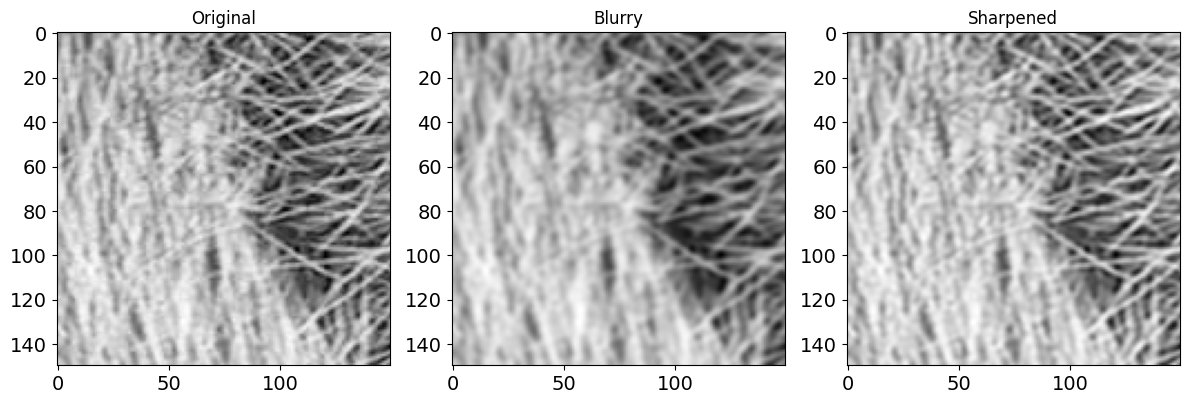

In [10]:
from skimage import filters
from scipy import ndimage

face = datasets.face(gray=True).astype(float)

fur = face[200:350, 200:350]

blurry_image = filters.gaussian(fur, sigma=1)

laplace_filtered = ndimage.laplace(blurry_image)

sharpened_image = blurry_image - laplace_filtered

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(fur, cmap="gray")
plt.title("Original")
plt.subplot(132)
plt.imshow(blurry_image, cmap="gray")
plt.title("Blurry")
plt.subplot(133)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened")
plt.tight_layout()
plt.show()

## 4) HSV cylinder
**(2.5 point)** 

In this exercise you will modify the code of the RGB-cube notebook such that the HSV values of pixels are visualized inside a HSV cylinder. Due to the interaction of the two different matplotlib environments you might want to write this code in a separate notebook.

First create an outline of the cylinder by drawing the top and bottom circles with 500 points each (*1 point*). The points of the bottom circle require you to: 
- create three 1D arrays with 500 elements each (we avoid the flatten step in the scatter plot command). The Hue array goes from 0 to 1, the Saturation array contains only ones, and the Value array only zeros.
- Because HSV uses a cylindrical coordinate system, we need to convert the HSV arrays into cartesian coordinates. Start by changing the range of the hue array to zero to 2 pi. Then use np.sin andn np.cos to compute three new arrays x_bottom, y_bottom and z_bottom that contain the 500 points forming the bottom circle of the HSV cylinder.
- plot the bottom circle into a 3D plot. You don't have to set the color of the circle.
- you do not need to label the horizontal dimensions of your plot, only the vertical one

Second, plot the top circle, which differs in that the Value of the points is 1, into the same plot (*0.5 points*).

Finally, load tetris.jpg and convert it to HSV, then convert HSV to cartesian coordinates and add every 50th point to the plot (*1 point*). 

**ANSWER**

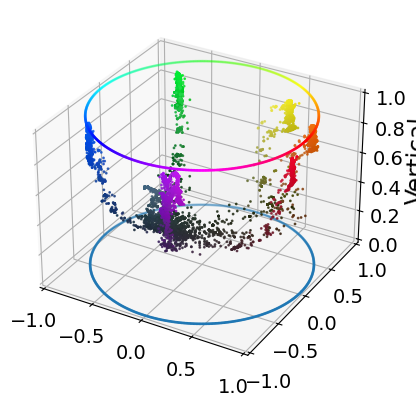

In [11]:
from skimage.color import hsv2rgb, rgb2hsv
from skimage.io import imread

hue = np.linspace(0, 1, 500)
saturation = np.ones(500)
value_bottom = np.zeros(500)
value_top = np.ones(500)

hue0 = hue * 2 * np.pi
x_bottom = np.cos(hue0)
y_bottom = np.sin(hue0)
z_bottom = np.zeros(500)

x_top = np.cos(hue0)
y_top = np.sin(hue0)
z_top = np.ones(500)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_bottom, y_bottom, z_bottom, s=1)
colorarray = np.transpose(np.vstack([hue, saturation, value_top]), (1, 0))
ax.scatter(x_top, y_top, z_top, color=hsv2rgb(colorarray), s=1)

image = imread("tetris.jpg")
image_hsv = rgb2hsv(image)

height, width, _ = image_hsv.shape

x = np.cos(image_hsv[..., 0] * 2 * np.pi) * image_hsv[..., 1]
y = np.sin(image_hsv[..., 0] * 2 * np.pi) * image_hsv[..., 1]
z = image_hsv[..., 2]

ax.scatter(
    x.flatten()[::50],
    y.flatten()[::50],
    z.flatten()[::50],
    s=1,
    c=hsv2rgb(image_hsv.reshape(-1, 3)[::50]),
    alpha=0.8,
)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)
ax.set_zlabel("Vertical")

plt.show()